In [86]:
import pandas as pd
import numpy as np
from nltk.stem.snowball import SnowballStemmer
import xlwt
import heapq
from heapq import *
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from EM import *
from cleaningData import *

# Imports from __future__ in case we're running Python 2
from __future__ import division, print_function
from __future__ import absolute_import, unicode_literals

# Our numerical workhorses
import scipy.integrate

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'svg',}

# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

Loading BokehJS ...

# Process data

In [87]:
df = pd.read_csv("NIPS_1987-2015.csv", sep=',', index_col = 0)
df.shape

(11463, 5811)

In [88]:
dfTranspose = df.transpose()

In [89]:
B = 300
R = 10
data = extractSubDictionaryBasedOnProportions(dfTranspose, B)
#data = extractSubDictionary(dfTranspose, B, R)
n = float(data.sum().sum())

In [90]:
#data.sum(1)
#nb de mots par article

In [91]:
df.sum().min()

0

In [92]:
n

3087071.0

In [93]:
data = dropVoidArticles(data)
#data

2452
2880
3277
4062
4099
4204
4228
5595


In [94]:
data.sum(1).nsmallest(20)

2002_81       3
2001_8       13
1988_93      27
1988_92      28
2001_6       59
1988_51      71
2002_151     78
1990_4       79
1989_78      81
1989_95     111
1989_89     123
1990_54     132
1987_48     135
1990_75     145
1997_20     147
2001_2      149
1989_96     151
1997_22     151
1993_79     152
1993_111    152
dtype: int64

# Run EM (on selected model)

In [95]:
thresholdConvergence = 1
epsilonForInitialization = .01
deltaInit = 0
L = len(data)
B = data.shape[1]
K = 5
#dataClean = dataClean.values
dataClean = data.values

In [96]:
PfromEM,PifromEM,RfromEM,logScoreFromEM,logScoresFromEM = expectationMaximisation2(dataClean, K, L, B, thresholdConvergence,  epsilonForInitialization, 200)


1-th short run of EM
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
('Initial logScore: ', -87163386.477305472)
E-step ...
('Number of clusters: ', 5, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 5, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
E-step ...
('Number of clusters: ', 5, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 5, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
E-step ...
('Number of clusters: ', 5, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 5, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
E-step ...
('Number of clusters: ', 5, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 5, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
E-step ...
('Number o

AttributeError: 'DataFrame' object has no attribute 'tolist'

In [102]:
K, P, Pi,R,logScore,logScores = readjustEM(dataClean, L, B, PfromEM, PifromEM,RfromEM,  logScoreFromEM,logScoresFromEM, thresholdConvergence, epsilonForInitialization, maxIterations = 200)

('Relative threshold under which the cluster is considered to disappear: ', 0.002)
('Disappearing indexes : ', array([3]))
There exist disapearing mixture proportions! Running adjusted EM...
('New adjusted number of clusters : ', 4)
[ 0.26586511  0.26205869  0.2031809   0.2688953 ]
('Current pi parameter: ', array([ 0.26586511,  0.26205869,  0.2031809 ,  0.2688953 ]))
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
('Initial logScore: ', -16896382.401788648)
E-step ...
('Number of clusters: ', 4, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 4, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
('It\xc3\xa9ration number: ', 1, '/ Last logScore: ', -16896382.401788648, '/ New log score: ', -16896382.688910194, '/ Difference attained: ', -0.28712154552340508)
('Current pi parameter: ', array([[ 0.26572751],
       [ 0.26197314],
       [ 0.20312259],
       [ 0.26917676]]))
WARNING! The lo

In [103]:
articles = data.index.values.tolist()  # an ndarray method, you probably shouldn't depend on this
dictionary = list(data.columns.values)
PAsDf = pd.DataFrame(P, columns = dictionary)

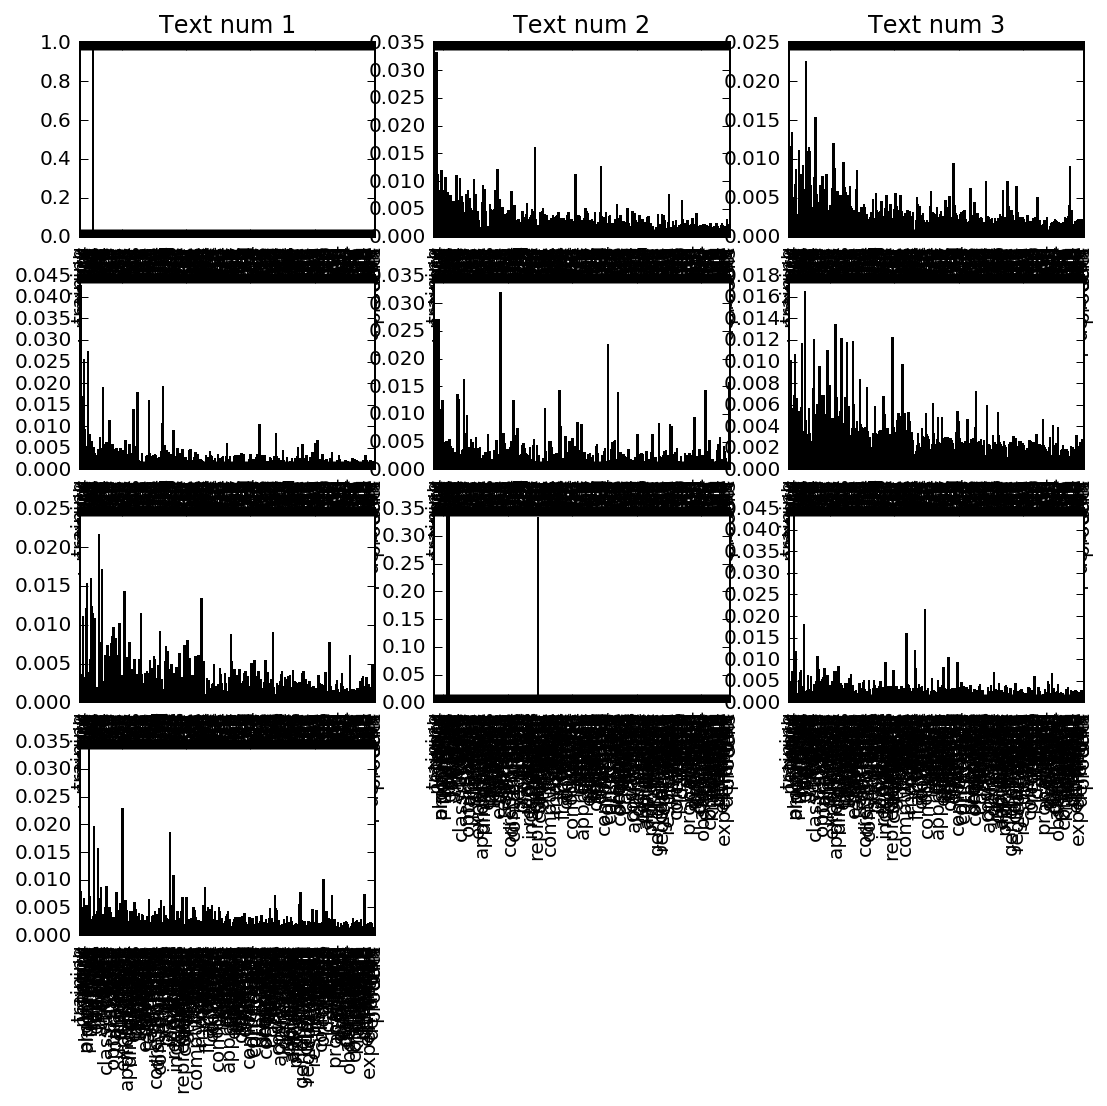

In [11]:
fig = plt.figure(1, figsize=(9,8))

for k in range(1, 11):
    fig.add_subplot(4,3,k)
    PAsDf.ix[k-1,].plot.bar()
    plt.axhline(0, color='k')
    plt.title("Text num " + str(k))

In [104]:
R

array([[  1.19390568e-025,   1.00000000e+000,   3.56034996e-056,
          3.75854134e-068],
       [  5.67251656e-141,   1.00000000e+000,   2.60378343e-234,
          5.13331941e-154],
       [  6.43938638e-096,   1.00000000e+000,   2.82769882e-141,
          1.26390815e-112],
       ..., 
       [  9.99818840e-001,   1.33914178e-192,   1.81160311e-004,
          4.15234626e-195],
       [  7.32992847e-155,   9.70152243e-319,   1.00000000e+000,
          3.06616397e-283],
       [  1.00000000e+000,   3.78727814e-235,   1.73720881e-083,
          1.46178563e-101]])

In [105]:
Rpost = R
groups = np.argmax(Rpost, axis=1)
groups = [list(groups)]
textGroups = pd.DataFrame(groups, columns = articles)

In [106]:
numberOfArticlesByYear = []
for i in range(1987,2016):
    #print(i)
    j = 0
    for l in list(textGroups):
        if str(i) == l[0:4]:
            j+=1
    numberOfArticlesByYear.append(j)
    
groupAveragesOverYears = []
j = 0
for y in range(29):
    #print (y)
    #print (j, j + numberOfArticlesByYear[y])
    groupAveragesOverYears.append(np.mean(Rpost[j:(j + numberOfArticlesByYear[y])], axis = 0))
    j = j + numberOfArticlesByYear[y]
    #print (j)
    
mostUsedWordsAccrossClusters = []
for i in range(len(P)):
    indexes = heapq.nlargest(30, range(len(P[i])), P[i].take)
    mostUsedWordsAccrossClusters.append([dictionary[u] for u in indexes])

In [107]:
selectedGroups = [3]
for g in selectedGroups:
    print(groups[0].count(g))

1171


In [108]:
selectedGroups = [3]
g = 3

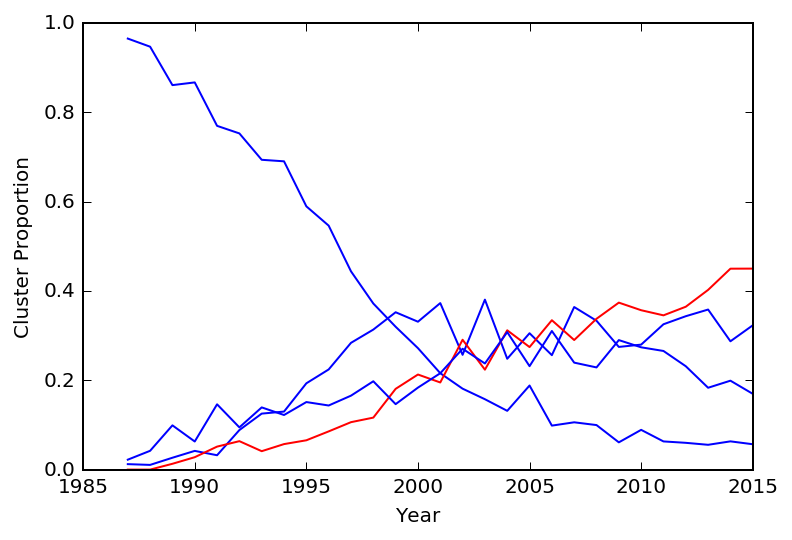

In [111]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

# Have a look at the colormaps here and decide which one you'd like:
# http://matplotlib.org/1.2.1/examples/pylab_examples/show_colormaps.html

#colormap = plt.cm.gist_ncar
#plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])

# Plot several different functions...
x = np.arange(1987,2016)
labels = []
for i in range(1, K + 1):
    if i == g:
        ax1.plot(x, [groupAveragesOverYears[y][i-1] for y in range(len(groupAveragesOverYears))], color = 'red')
    else:
        ax1.plot(x, [groupAveragesOverYears[y][i-1] for y in range(len(groupAveragesOverYears))], color = 'blue')
    labels.append(r'$Group %i $'%i )

# I'm basically just demonstrating several different legend options here...
#ax1.legend(labels, ncol=4, loc='upper center', 
           #bbox_to_anchor=[0.5, 1.1], 
           #columnspacing=1.0, labelspacing=0.0,
        #handletextpad=0.0, handlelength=1.5, fancybox=True, shadow=True)
#plt.style.use("ggplot")
plt.xlabel("Year")
plt.ylabel("Cluster Proportion")
plt.show()
fig1.savefig('proportionsOverTimeGroup' + str(g)+ 'Highlighted.png')




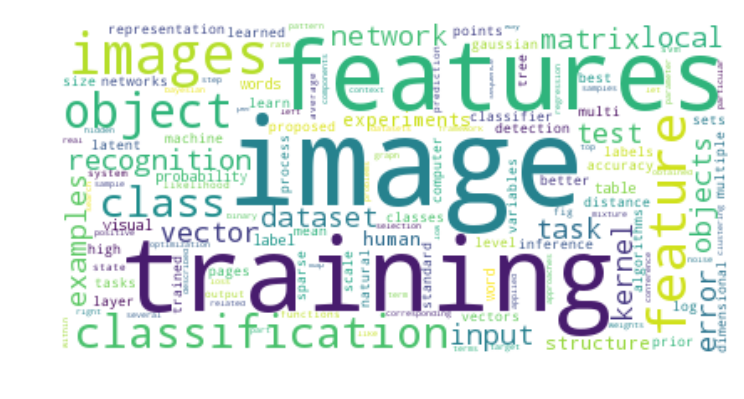

In [112]:
dicGroup = dict(zip(dictionary, list(P[g])))
wordcloud = WordCloud( background_color='white')
wordcloud.generate_from_frequencies(frequencies=dicGroup)
wc = plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.savefig('wordCloudGroup' + str(g)+ '.png')



In [15]:
groupAveragesOverYears[3]

array([  1.35450723e-211,   6.99300706e-003,   1.35624303e-002,
         6.04302615e-001,   2.69814348e-001,   2.09790209e-002,
         1.44124645e-002,   1.47646383e-202,   1.39921174e-002,
         5.59439976e-002])

In [16]:
groupAveragesOverYears[2]

array([  1.02610561e-228,   6.25808292e-006,   1.25012397e-017,
         5.04797560e-001,   3.66416724e-001,   9.90099010e-003,
         1.97957472e-002,   1.00664982e-228,   9.97388104e-003,
         8.91088391e-002])

In [17]:
groupAveragesOverYears[9]

array([ 0.        ,  0.03304275,  0.05904785,  0.34418466,  0.20354602,
        0.14424484,  0.05233043,  0.        ,  0.1055918 ,  0.05801165])

In [19]:
len(groups[0])

5803

In [20]:
selectedGroups = [7,  3, 4]
for g in selectedGroups:
    print(groups[0].count(g))

1
785
756


RMQ: must be greater than 10

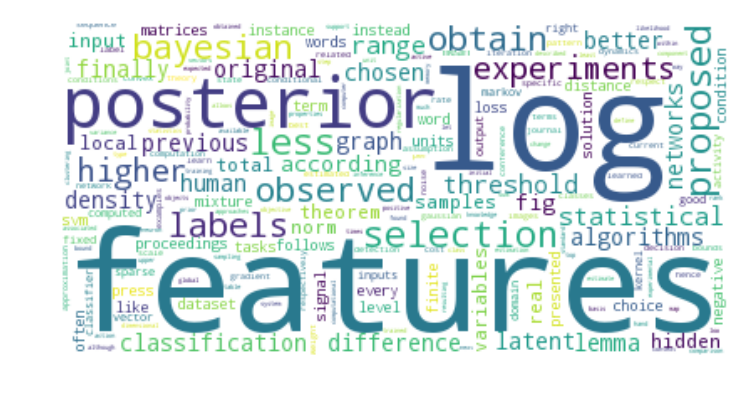

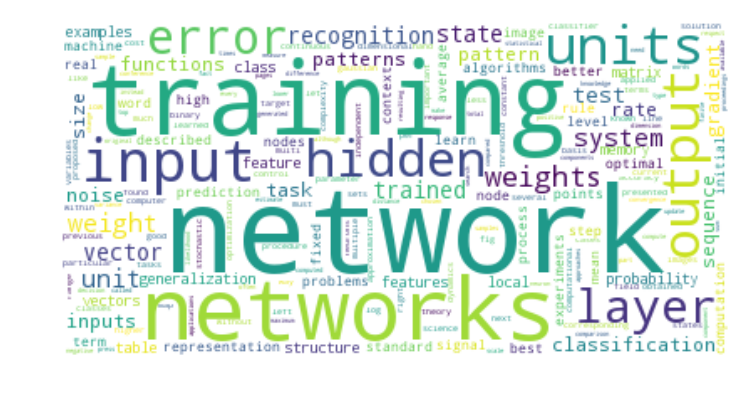

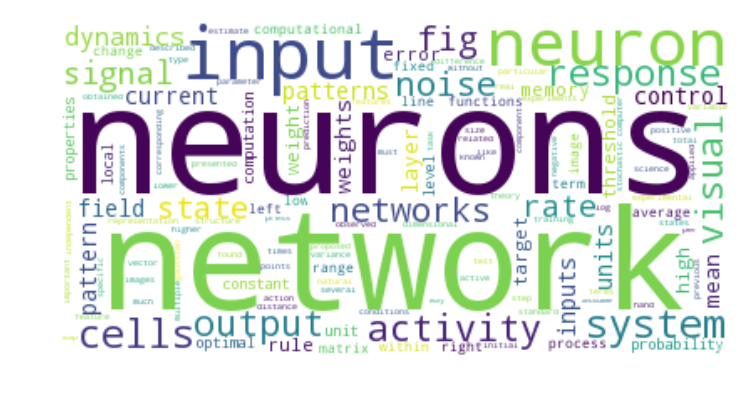

In [21]:
for g in selectedGroups:
    dicGroup = dict(zip(dictionary, list(P[g])))
    wordcloud = WordCloud( background_color='white')
    wordcloud.generate_from_frequencies(frequencies=dicGroup)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

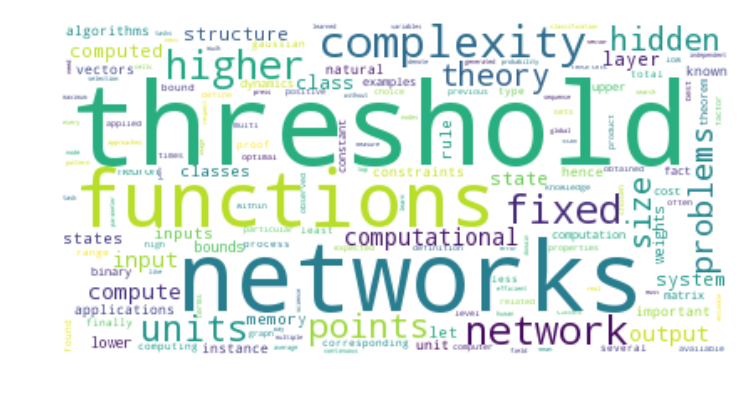

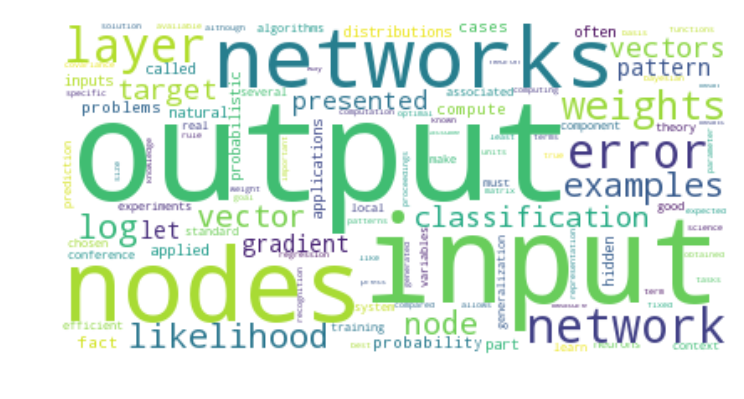

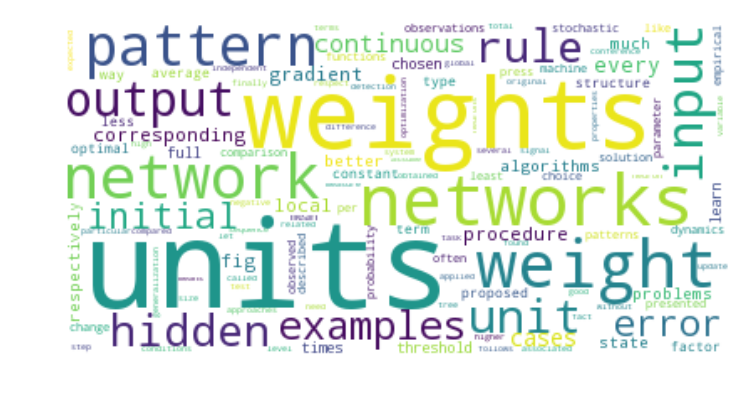

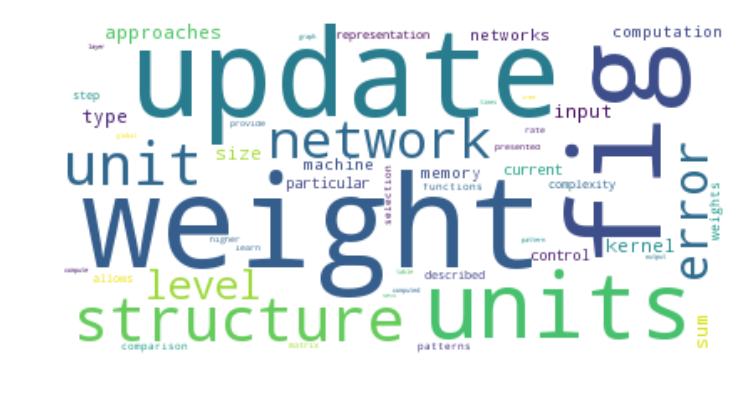

In [22]:
closestArticles = nlargest(4, range(len(Rpost[:,3])), Rpost[:,3].take)
for article in closestArticles:
    wordRepartitionArticle = list(data.ix[article])
    nbWords = float(sum(wordRepartitionArticle))
    proportionsArticle = [u / nbWords for u in wordRepartitionArticle]
    dicGroup = dict(zip(dictionary,  proportionsArticle  ))
    wordcloud = WordCloud( background_color='white')
    wordcloud.generate_from_frequencies(frequencies=dicGroup)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

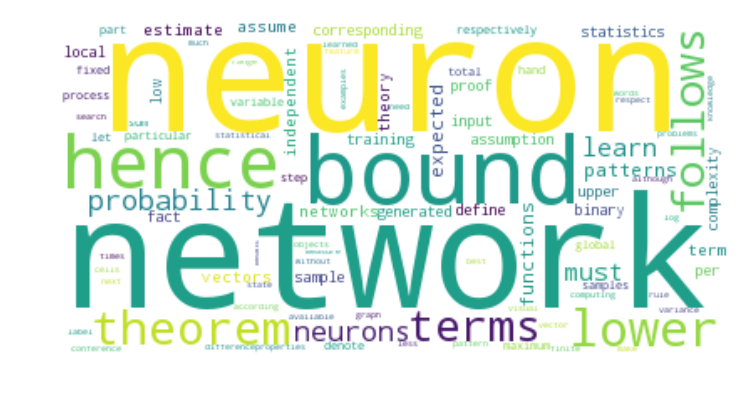

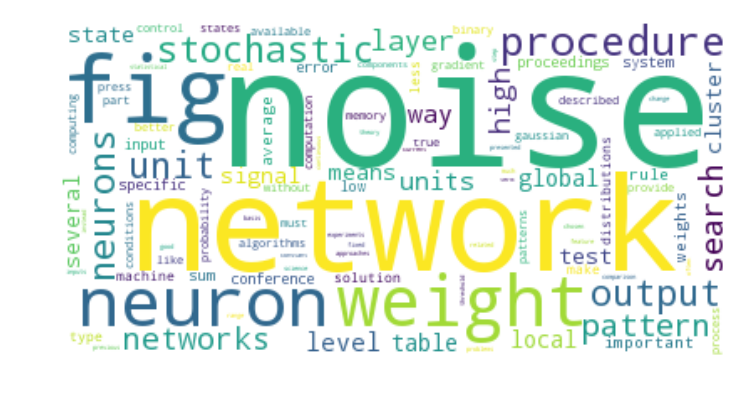

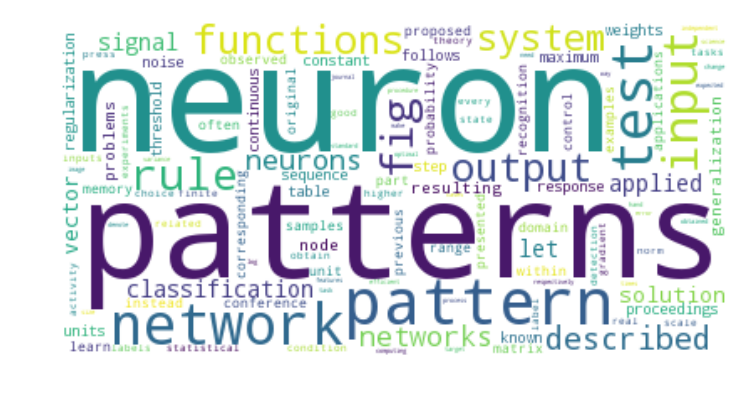

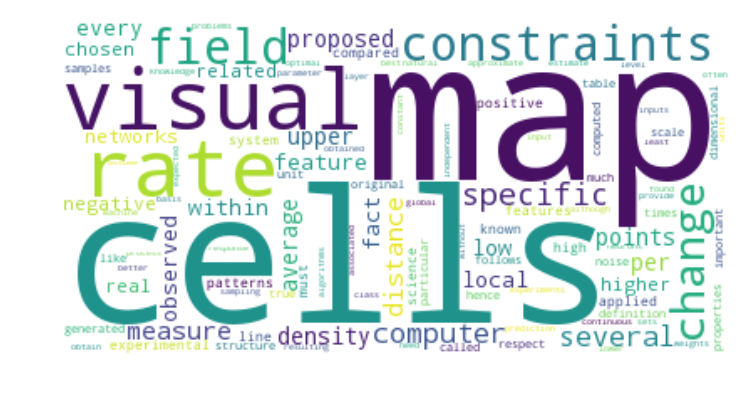

In [23]:
closestArticles = nlargest(4, range(len(Rpost[:,3])), Rpost[:,4].take)
for article in closestArticles:
    wordRepartitionArticle = list(data.ix[article])
    nbWords = float(sum(wordRepartitionArticle))
    proportionsArticle = [u / nbWords for u in wordRepartitionArticle]
    dicGroup = dict(zip(dictionary,  proportionsArticle  ))
    wordcloud = WordCloud( background_color='white')
    wordcloud.generate_from_frequencies(frequencies=dicGroup)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

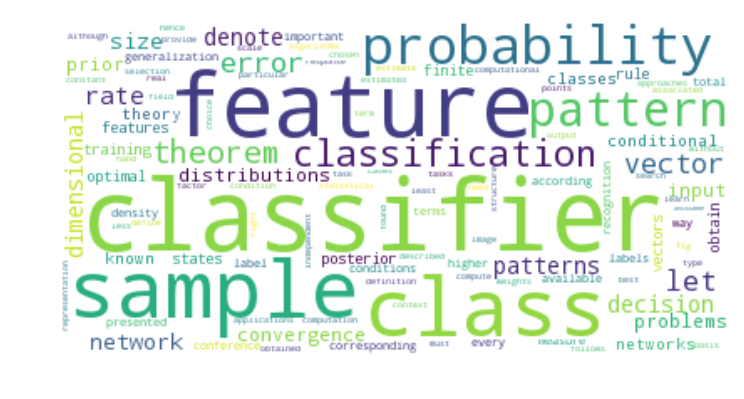

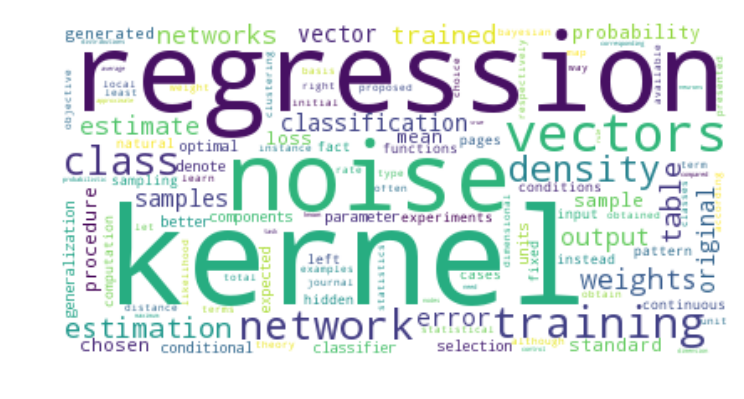

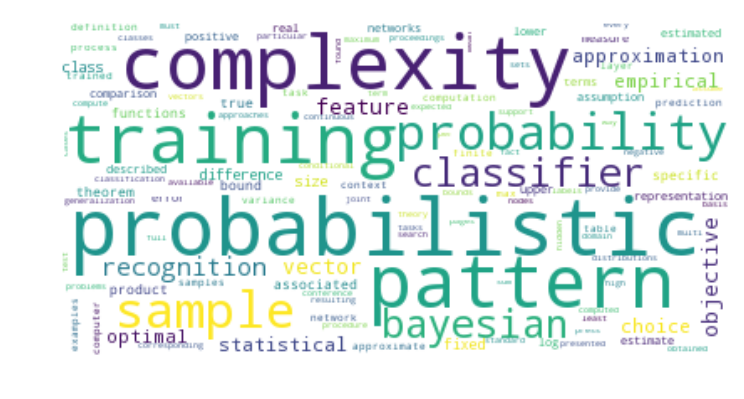

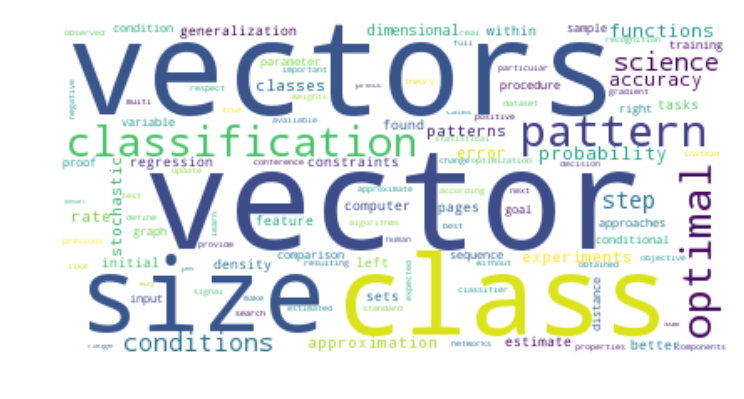

In [24]:
closestArticles = nlargest(4, range(len(Rpost[:,0])), Rpost[:,2].take)
for article in closestArticles:
    wordRepartitionArticle = list(data.ix[article])
    nbWords = float(sum(wordRepartitionArticle))
    proportionsArticle = [u / nbWords for u in wordRepartitionArticle]
    dicGroup = dict(zip(dictionary,  proportionsArticle  ))
    wordcloud = WordCloud( background_color='white')
    wordcloud.generate_from_frequencies(frequencies=dicGroup)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()